# Linear Regression

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [2]:
#Loading the advertising dataset

advertising = pd.read_csv("/Users/sriramnatarajan/Documents/ML-based causal inference tutorial/Machine-Learning-Books-With-Python-master/Introduction to Statistical Learning/data/Advertising.csv")
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


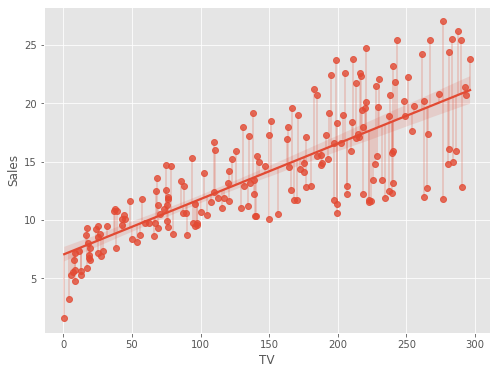

In [3]:
fit = np.polyfit(x = advertising['TV'],y = advertising['Sales'], deg = 1)
y_hat = fit[1] + fit[0] * advertising['TV']

plt.figure(figsize = (8,6))
sns.regplot(x = 'TV',y = 'Sales', data = advertising)
plt.vlines(advertising['TV'],y_hat,advertising['Sales'], lw = 0.4)


In [3]:
from scipy.special import comb

probs = [comb(100, i) * 0.5**100 for i in range(41,60)]
sum(probs)

0.9431120663590192

In [5]:
np.random.rand(1000,100)

array([[0.73194817, 0.13768673, 0.79020853, ..., 0.972241  , 0.60177685,
        0.32583732],
       [0.57679182, 0.58894891, 0.95899846, ..., 0.93474245, 0.78321442,
        0.22335001],
       [0.53495012, 0.03059807, 0.05354737, ..., 0.59544706, 0.25015741,
        0.00530861],
       ...,
       [0.64734605, 0.15594382, 0.61468186, ..., 0.87166118, 0.8396334 ,
        0.86146922],
       [0.11363525, 0.76356532, 0.36528476, ..., 0.68038175, 0.63007304,
        0.81618127],
       [0.15185139, 0.79790332, 0.18032249, ..., 0.59169676, 0.35009015,
        0.85792687]])

In [6]:
((np.random.rand(1000,100) > .5).mean(1) >= 0.6).mean()

0.028

Text(0.5, 1.0, 'Linear Regression Model')

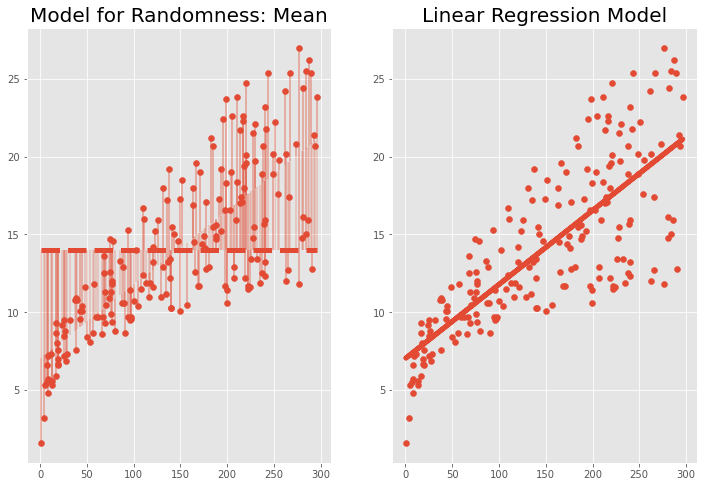

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,8))
ax1.scatter(x = advertising['TV'], y = advertising['Sales'])
ax1.hlines(advertising['Sales'].mean(), advertising['TV'].min(), advertising['TV'].max(), linestyle = '--', lw = 5)
ax1.vlines(advertising['TV'], advertising['Sales'], advertising['Sales'].mean(), lw = 0.4)
ax1.set_title("Model for Randomness: Mean", fontsize = 20)

ax2.scatter(x = advertising['TV'], y = advertising['Sales'])
ax2.plot( advertising['TV'],  fit[1] + fit [0]*advertising['TV'], lw = 5)
ax1.vlines(advertising['TV'], advertising['Sales'], fit[1] + fit [0]*advertising['TV'], lw = 0.4)
ax2.set_title("Linear Regression Model", fontsize = 20)


### Errors using the Mean and Model

In [8]:
errors_mean = abs(advertising['Sales']-advertising['Sales'].mean())
errors_model = abs(advertising['Sales'] - (fit[1] + fit[0]* advertising['TV']))

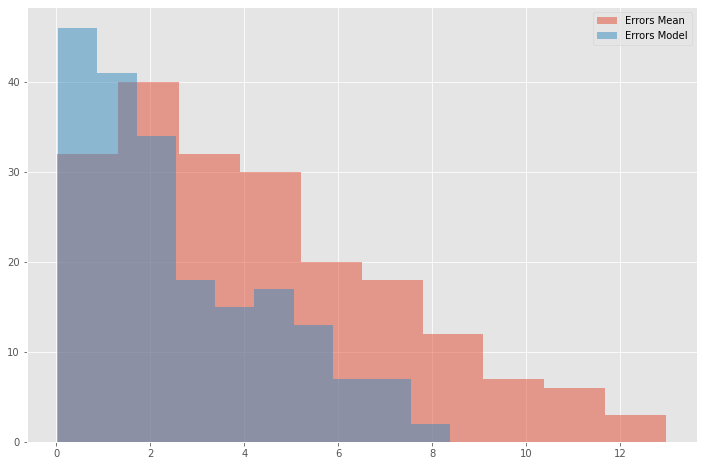

In [9]:
plt.figure(figsize=(12,8))
plt.hist(errors_mean, alpha = 0.5, label = 'Errors Mean')
plt.hist(errors_model, alpha = 0.5, label = 'Errors Model')
plt.legend()

In [10]:
# Calculating SST, SSE and R^2

SST = (errors_mean ** 2).sum()
SSE = (errors_model ** 2).sum()

SSE, SST

(2102.530583131351, 5417.14875)

In [11]:
R = 1 - SSE/SST
print (" R value is:", R)

 R value is: 0.6118750508500712


### StatsModels API - Commands look very similar to R

In [12]:
import statsmodels.formula.api as smf

In [13]:
results = smf.ols('Sales~TV', data = advertising).fit()

In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 01 Aug 2022   Prob (F-statistic):           1.47e-42
Time:                        15:18:31   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Simple Linear Regression with Newspaper

results = smf.ols('Sales ~ Newspaper', data = advertising).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 01 Aug 2022   Prob (F-statistic):            0.00115
Time:                        15:18:31   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multiple Regression

In [16]:
results = smf.ols('Sales ~ Newspaper + TV + Radio', data = advertising).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 01 Aug 2022   Prob (F-statistic):           1.58e-96
Time:                        15:18:31   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Categorical Predictor Variables

In [17]:
Credit = pd.read_csv("/Users/sriramnatarajan/Documents/ML-based causal inference tutorial/Machine-Learning-Books-With-Python-master/Introduction to Statistical Learning/data/Credit.csv")
Credit['Female'] = (Credit.Gender == 'Female').astype(int)
Credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Female
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0


In [18]:
results = smf.ols('Balance ~ Female', data = Credit).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Mon, 01 Aug 2022   Prob (F-statistic):              0.669
Time:                        15:18:31   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    509.8031     33.128     15.389      0.000     444.675     574.931
Female        19.7331     46.051      0.429      0.669     -70.801     110.267
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
Credit[Credit['Female']==0]['Balance'].mean(), Credit[Credit['Female']==1]['Balance'].mean()

(509.8031088082902, 529.536231884058)

### Models with Interaction Effect

In [20]:
results = smf.ols('Sales ~ TV + Radio + TV*Radio', data = advertising).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          6.68e-146
Time:                        15:18:31   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# Non Linearity of Data
resid = advertising['Sales']- results.predict(advertising)

(-2.0, 2.0)

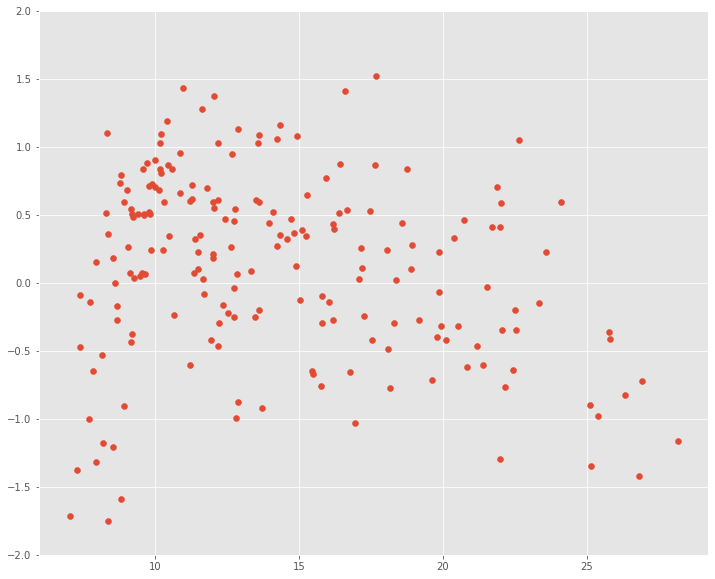

In [22]:
#Plotting residuals

plt.figure(figsize = (12,10))
plt.scatter(x = results.predict(advertising), y = resid)
plt.ylim(-2,2)

### Lab 

In [23]:
Boston = pd.read_csv("/Users/sriramnatarajan/Documents/ML-based causal inference tutorial/Machine-Learning-Books-With-Python-master/Introduction to Statistical Learning/data/boston.csv")
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<AxesSubplot:xlabel='lstat', ylabel='medv'>

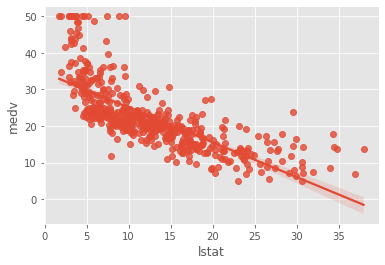

In [24]:
sns.regplot(x = 'lstat', y = 'medv', data = Boston)

In [25]:
# Trying to plot results from smf

results = smf.ols('medv~lstat', data = Boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 01 Aug 2022   Prob (F-statistic):           5.08e-88
Time:                        15:18:32   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

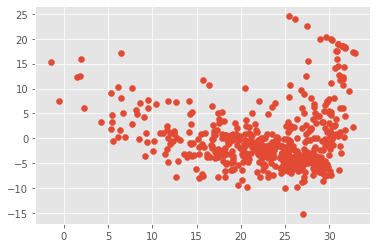

In [26]:
plt.scatter(x = results.fittedvalues, y = results.resid)

In [27]:
string_cols = ' + '.join(Boston.columns[:-1])
results = smf.ols('medv ~ {}'.format(string_cols), data = Boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          6.72e-135
Time:                        15:18:32   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# Removing age from the rpevious list

string_cols = ' + '.join(Boston.columns[:-1].difference(['age']))
results = smf.ols('medv ~ {}'.format(string_cols), data = Boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          6.08e-136
Time:                        15:18:32   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.000      26.456      46.418
black          0.0093      0.003      3.481      0.001       0.004       0.015
chas           2.6890      0.860      3.128      0.002       1.000       4.378
crim          -0.1080      0.033     -3.290      0.001      -0.173      -0.043
dis           -1.4786      0.191     -7.757      0.000      -1.853      -1.104
indus          0.0206      0.061      0.335      0.738      -0.100       0.141
lstat         -0.5239      0.048    -10.999      0.000      -0.617      -0.430
nox          -17.7135      3.679     -4.814      0.000     -24.943     -10.484
ptratio       -0.9522      0.130     -7.308      0.000      -1.208      -0.696
rad            0.3058      0.066      4.627      0.000       0.176       0.436
rm             3.8144      0.408      9.338      0.000       3.012       4.617
tax           -0.0123      0.004     -3.283      0.001      -0.020      -0.005
zn             0.0463      0.014      3.404      0.001       0.020       0.073
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# Individual terms and interaction terms

results = smf.ols('medv ~ lstat*age', data = Boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Mon, 01 Aug 2022   Prob (F-statistic):           4.86e-88
Time:                        15:18:32   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
from statsmodels.stats.anova import anova_lm

In [31]:
np.power(Boston['lstat'],2), Boston['lstat']

(0      24.8004
 1      83.5396
 2      16.2409
 3       8.6436
 4      28.4089
         ...   
 501    93.5089
 502    82.4464
 503    31.8096
 504    41.9904
 505    62.0944
 Name: lstat, Length: 506, dtype: float64,
 0      4.98
 1      9.14
 2      4.03
 3      2.94
 4      5.33
        ... 
 501    9.67
 502    9.08
 503    5.64
 504    6.48
 505    7.88
 Name: lstat, Length: 506, dtype: float64)

### Exercises

In [32]:
# 8

Auto = pd.read_csv("/Users/sriramnatarajan/Documents/ML-based causal inference tutorial/Machine-Learning-Books-With-Python-master/Introduction to Statistical Learning/data/auto.csv")

Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [33]:
results = smf.ols('mpg ~ horsepower', data = Auto).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 01 Aug 2022   Prob (F-statistic):           7.03e-81
Time:                        15:18:32   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

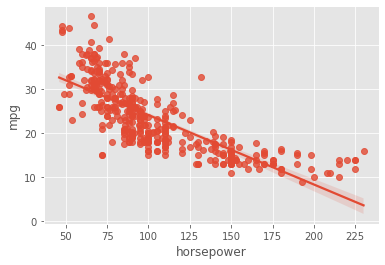

In [34]:
sns.regplot(x = 'horsepower', y = 'mpg', data = Auto)

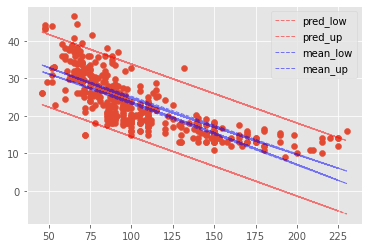

In [35]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy import stats

st, data, ss2 = summary_table(results, alpha=0.05)

fittedvalues = data[:, 2]
predict_mean_se = data[:, 3]
predict_mean_ci_low, predict_mean_ci_up= data[:, 4:6].T
predict_ci_low, predict_ci_up = data[:,6:8].T

plt.scatter(x= Auto['horsepower'], y = Auto['mpg'])
plt.plot(Auto['horsepower'], predict_ci_low, 'r--', lw = 1, alpha = 0.5, label = 'pred_low')
plt.plot(Auto['horsepower'], predict_ci_up,'r--', lw = 1, alpha = 0.5, label = 'pred_up')
plt.plot(Auto['horsepower'], predict_mean_ci_low, 'b--', lw = 1, alpha = 0.5, label = 'mean_low')
plt.plot(Auto['horsepower'], predict_mean_ci_up, 'b--', lw = 1, alpha = 0.5, label = 'mean_up')

plt.legend()

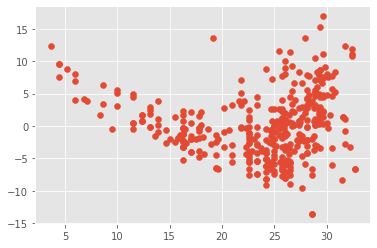

In [36]:
plt.scatter(results.fittedvalues, results.resid)

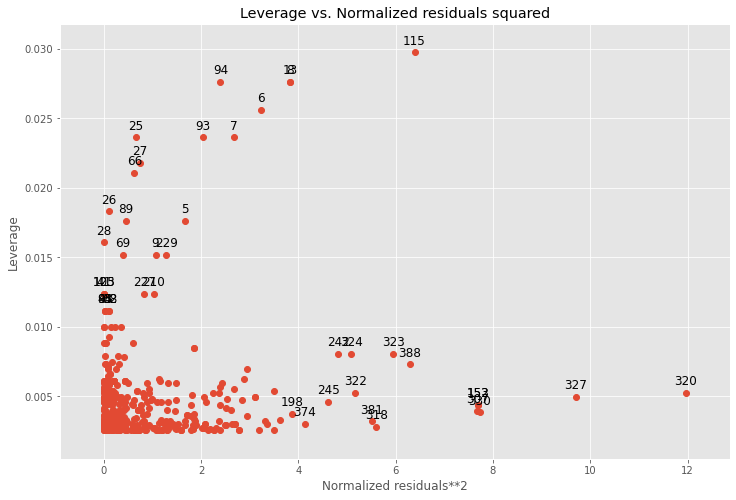

In [37]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize = (12,8))
fig = plot_leverage_resid2(results, ax = ax)

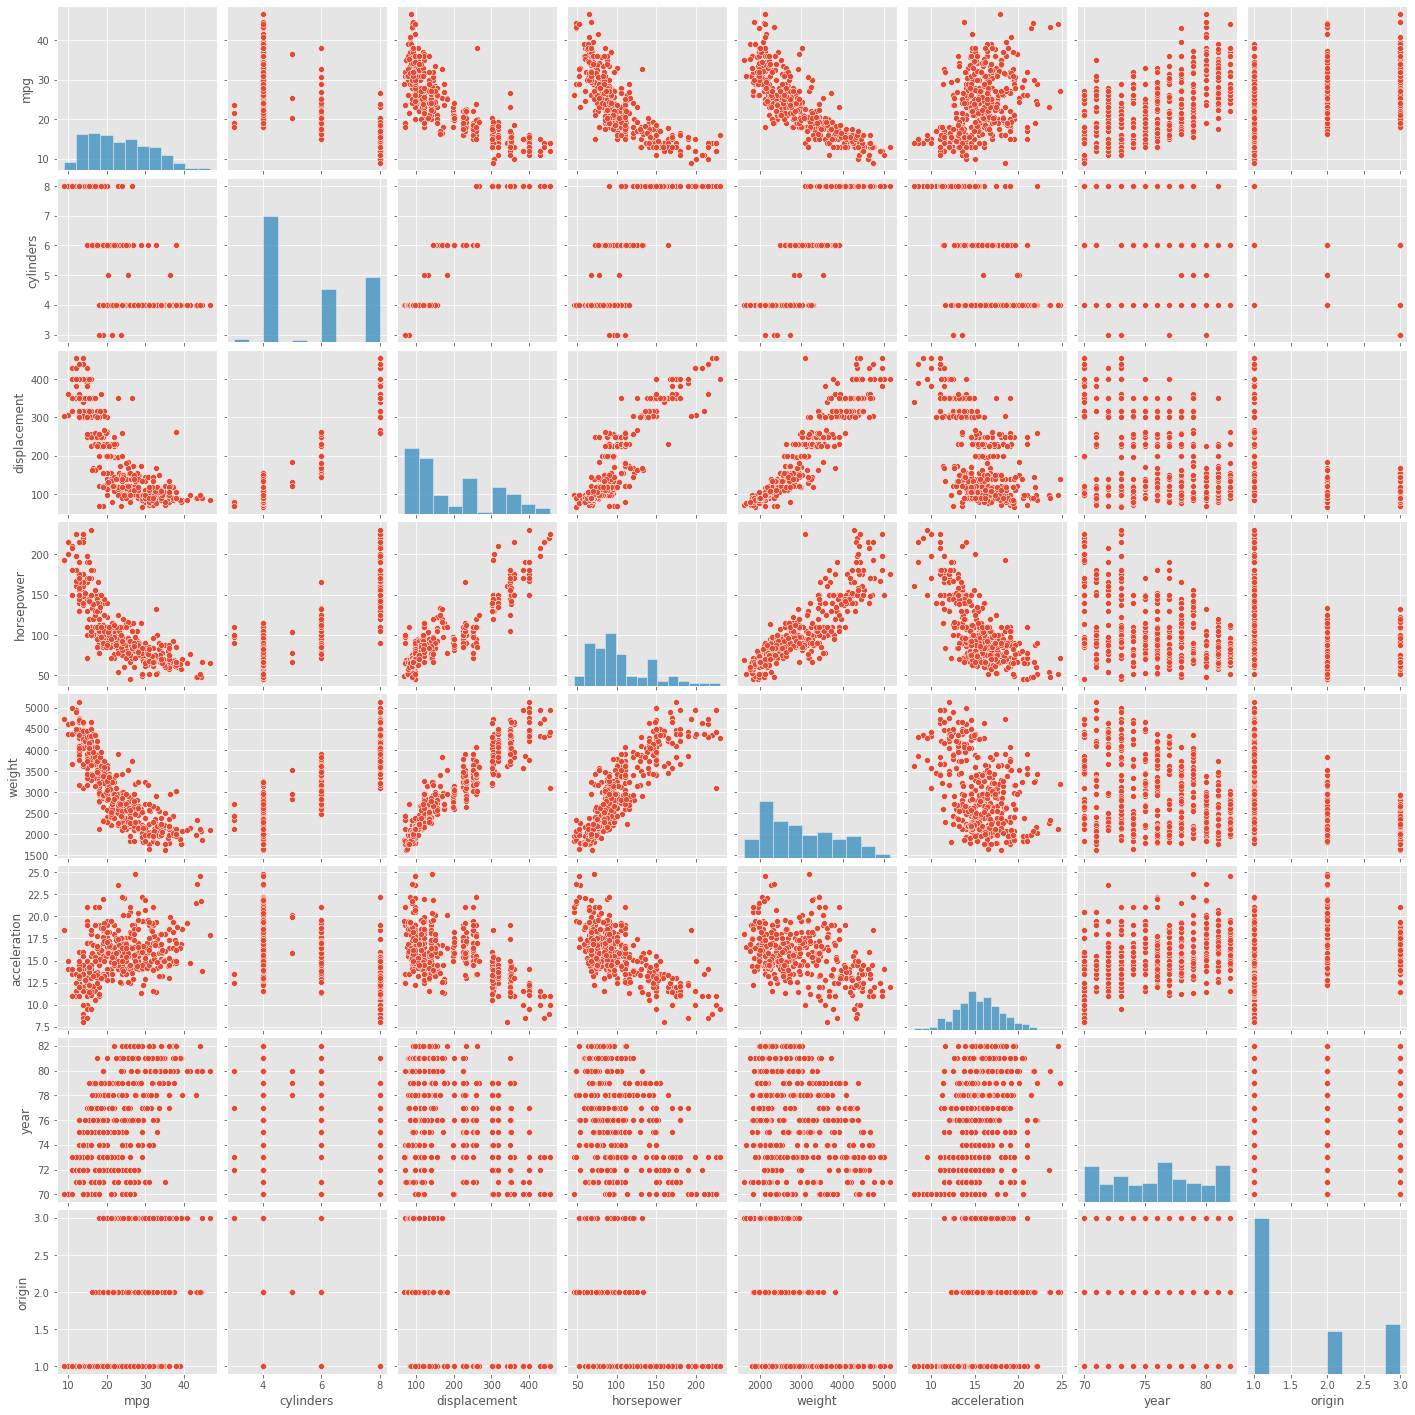

In [38]:
# 9 Auto dataset -a

sns.pairplot(Auto)

In [39]:
# b

Auto.corr()
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [40]:
# c - Multiple Linear regression

string_cols = ' + '.join(Auto.columns[1:-1])
results = smf.ols('mpg ~ {}'.format(string_cols), data = Auto).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          2.04e-139
Time:                        15:18:43   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

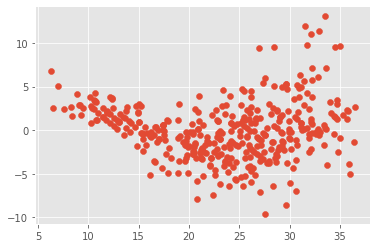

In [41]:
# Plotting fitted values and residuals

plt.scatter(results.fittedvalues, results.resid)

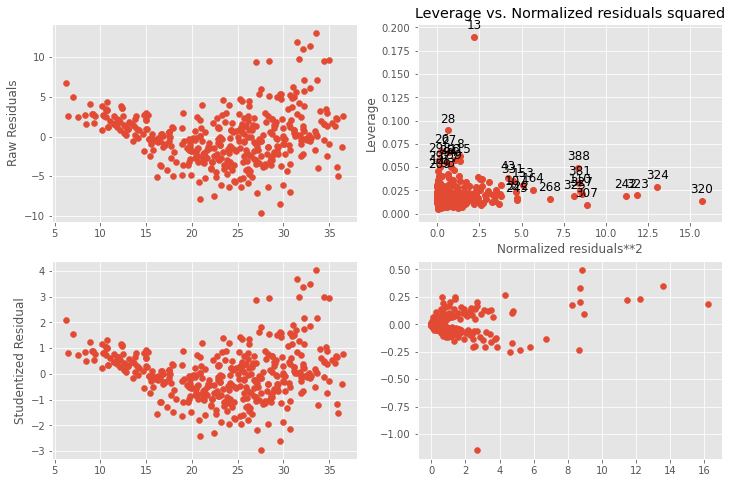

In [42]:
# Running Daignostics on OLS results
import statsmodels.api as sm


results_influence = OLSInfluence(results)

fig, ax = plt.subplots(2,2, figsize = (12,8))
ax[0,0].scatter(results.fittedvalues, results.resid)
ax[0,0].set_ylabel('Raw Residuals')
ax[1,0].scatter(results.fittedvalues, results_influence.resid_studentized_external)
ax[1,0].set_ylabel('Studentized Residual')
ax[1,1].scatter(results_influence.resid_studentized_external ** 2, results_influence.influence)
ax[0,1] = plot_leverage_resid2(results, ax = ax[0,1])

In [43]:
# Regression with interaction effects

from itertools import combinations

interactions_formula = ' + '. join([comb[0]+'*'+comb[1] for comb in combinations(Auto.columns[1:-1], 2)])
interactions_formula

'cylinders*displacement + cylinders*horsepower + cylinders*weight + cylinders*acceleration + cylinders*year + cylinders*origin + displacement*horsepower + displacement*weight + displacement*acceleration + displacement*year + displacement*origin + horsepower*weight + horsepower*acceleration + horsepower*year + horsepower*origin + weight*acceleration + weight*year + weight*origin + acceleration*year + acceleration*origin + year*origin'

In [44]:
formula = 'mpg ~' + "+".join(Auto.columns[1:-1])
formula += '+' + interactions_formula

results = smf.ols(formula, data = Auto).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          4.01e-155
Time:                        15:18:45   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    35.4789     53.136      0.668      0.505     -69.014     139.972
cylinders                     6.9886      8.248      0.847      0.397      -9.231      23.208
displacement                 -0.4785      0.189     -2.527      0.012      -0.851      -0.106
horsepower                    0.5034      0.347      1.451      0.148      -0.179       1.186
weight                        0.0041      0.018      0.235      0.814      -0.030       0.039
acceleration                 -5.8592      2.174     -2.696      0.007     -10.134      -1.585
year                          0.6974      0.610      1.144      0.253      -0.501       1.896
origin                      -20.8956      7.097     -2.944      0.003     -34.852      -6.939
cylinders:displacement       -0.0034      0.006     -0.524      0.601      -0.016       0.009
cylinders:horsepower          0.0116      0.024      0.480      0.632      -0.036       0.059
cylinders:weight              0.0004      0.001      0.399      0.690      -0.001       0.002
cylinders:acceleration        0.2779      0.166      1.670      0.096      -0.049       0.605
cylinders:year               -0.1741      0.097     -1.793      0.074      -0.365       0.017
cylinders:origin              0.4022      0.493      0.816      0.415      -0.567       1.371
displacement:horsepower   -8.491e-05      0.000     -0.294      0.769      -0.001       0.000
displacement:weight        2.472e-05   1.47e-05      1.682      0.093   -4.18e-06    5.36e-05
displacement:acceleration    -0.0035      0.003     -1.041      0.299      -0.010       0.003
displacement:year             0.0059      0.002      2.482      0.014       0.001       0.011
displacement:origin           0.0240      0.019      1.232      0.219      -0.014       0.062
horsepower:weight         -1.968e-05   2.92e-05     -0.673      0.501   -7.72e-05    3.78e-05
horsepower:acceleration      -0.0072      0.004     -1.939      0.053      -0.015       0.000
horsepower:year              -0.0058      0.004     -1.482      0.139      -0.014       0.002
horsepower:origin             0.0022      0.029      0.076      0.939      -0.055       0.060
weight:acceleration           0.0002      0.000      1.025      0.306      -0.000       0.001
weight:year                  -0.0002      0.000     -1.056      0.292      -0.001       0.000
weight:origin                -0.0006      0.002     -0.364      0.716      -0.004       0.003
acceleration:year             0.0556      0.026      2.174      0.030       0.005       0.106
acceleration:origin           0.4583      0.157      2.926      0.004       0.150       0.766
year:origin                   0.1393      0.074      1.882      0.061      -0.006       0.285
===========================================================================

In [45]:
# Adding displacement^2 to the model

formula += '+ np.power(displacement,2)'
results = smf.ols(formula, data = Auto).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     100.4
Date:                Mon, 01 Aug 2022   Prob (F-statistic):          3.99e-154
Time:                        15:18:45   Log-Likelihood:                -929.68
No. Observations:                 392   AIC:                             1919.
Df Residuals:                     362   BIC:                             2039.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    34.4972     53.333      0.647      0.518     -70.385     139.379
cylinders                     7.4456      8.437      0.882      0.378      -9.147      24.038
displacement                 -0.4852      0.191     -2.537      0.012      -0.861      -0.109
horsepower                    0.4980      0.348      1.431      0.153      -0.186       1.182
weight                        0.0044      0.018      0.247      0.805      -0.030       0.039
acceleration                 -5.8498      2.177     -2.687      0.008     -10.130      -1.569
year                          0.6998      0.611      1.146      0.252      -0.501       1.900
origin                      -20.6750      7.155     -2.890      0.004     -34.746      -6.604
cylinders:displacement       -0.0054      0.010     -0.542      0.588      -0.025       0.014
cylinders:horsepower          0.0130      0.025      0.523      0.601      -0.036       0.062
cylinders:weight              0.0005      0.001      0.476      0.634      -0.002       0.002
cylinders:acceleration        0.2675      0.171      1.562      0.119      -0.069       0.604
cylinders:year               -0.1784      0.099     -1.809      0.071      -0.372       0.016
cylinders:origin              0.3362      0.553      0.608      0.543      -0.751       1.423
displacement:horsepower      -0.0001      0.000     -0.393      0.695      -0.001       0.001
displacement:weight        2.115e-05      2e-05      1.059      0.290   -1.81e-05    6.04e-05
displacement:acceleration    -0.0032      0.003     -0.925      0.355      -0.010       0.004
displacement:year             0.0060      0.002      2.489      0.013       0.001       0.011
displacement:origin           0.0262      0.021      1.237      0.217      -0.015       0.068
horsepower:weight         -1.672e-05   3.13e-05     -0.534      0.594   -7.84e-05    4.49e-05
horsepower:acceleration      -0.0074      0.004     -1.946      0.052      -0.015    8.04e-05
horsepower:year              -0.0058      0.004     -1.467      0.143      -0.014       0.002
horsepower:origin             0.0018      0.029      0.063      0.950      -0.056       0.060
weight:acceleration           0.0002      0.000      0.995      0.320      -0.000       0.001
weight:year                  -0.0002      0.000     -1.067      0.287      -0.001       0.000
weight:origin                -0.0007      0.002     -0.421      0.674      -0.004       0.003
acceleration:year             0.0560      0.026      2.183      0.030       0.006       0.106
acceleration:origin           0.4617      0.157      2.934      0.004       0.152       0.771
year:origin                   0.1399      0.074      1.887      0.060      -0.006       0.286
np.power(displacement, 2)  4.751e-05      0.000      0.264      0.792      

In [46]:
#10 Carseats

Carseats = pd.read_csv("/Users/sriramnatarajan/Documents/ML-based causal inference tutorial/Machine-Learning-Books-With-Python-master/Introduction to Statistical Learning/data/carseats.csv")
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [47]:
results = smf.ols('Sales ~ Price + Urban + US', data = Carseats).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 01 Aug 2022   Prob (F-statistic):           2.39e-23
Time:                        15:18:45   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
results = smf.ols('Sales ~ Price + US', data = Carseats).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 01 Aug 2022   Prob (F-statistic):           2.66e-24
Time:                        15:18:45   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

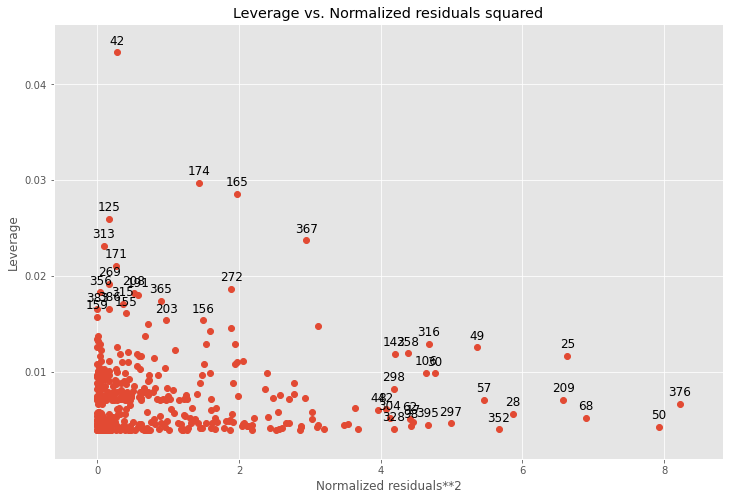

In [49]:
# Leverage of observations

fig, ax = plt.subplots(figsize = (12,8))
fig = plot_leverage_resid2(results, ax = ax)

In [50]:
# Regression without intercept

np.random.seed(1)
x = np.random.randn(100)
f = lambda x: 2 * x 

y = f(x) + np.random.randn(100)

In [51]:
results = sm.OLS(x, y).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Mon, 01 Aug 2022   Prob (F-statistic):                    3.46e-36
Time:                        15:18:46   Log-Likelihood:                         -49.891
No. Observations:                 100   AIC:                                      101.8
Df Residuals:                      99   BIC:                                      104.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3789      0.019     19.792      0.000       0.341       0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
results = sm.OLS(x, sm.add_constant(y)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Mon, 01 Aug 2022   Prob (F-statistic):           5.39e-36
Time:                        15:18:46   Log-Likelihood:                -49.289
No. Observations:                 100   AIC:                             102.6
Df Residuals:                      98   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0440      0.040     -1.090      0.279      -0.124       0.036
x1             0.3817      0.019     19.783      0.000       0.343       0.420
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.611
Skew:                           0.118   Prob(JB):                        0.737
Kurtosis:                       2.698   Cond. No.                         2.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# 13 -a,b,c

np.random.seed(1)
x= np.random.randn(100) #-Feature
eps = np.random.randn(100)*0.5
y = -1 + 0.5 * x + eps

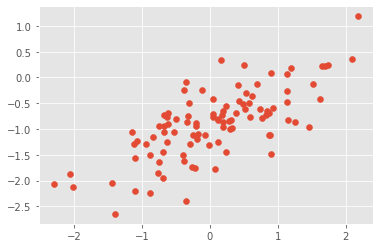

In [58]:
plt.scatter(x,y)

In [60]:
results = sm.OLS(y,sm.add_constant(x)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Mon, 01 Aug 2022   Prob (F-statistic):           2.20e-17
Time:                        15:53:20   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9265      0.047    -19.717      0.000      -1.020      -0.833
x1             0.5477      0.053     10.342      0.000       0.443       0.653
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

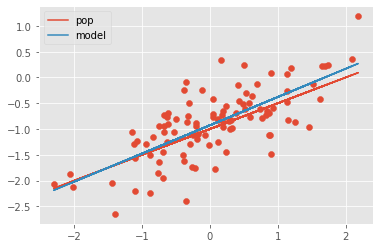

In [67]:
plt.scatter(x, y)
plt.plot(x, -1 + 0.5*x , label = 'pop')
plt.plot(x, results.params[0]+results.params[1]*x, label = 'model')
plt.legend()

In [68]:
x2 = np.column_stack((np.ones(100), x, x**2))
results = sm.OLS(y, x2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     52.96
Date:                Mon, 01 Aug 2022   Prob (F-statistic):           2.83e-16
Time:                        15:59:48   Log-Likelihood:                -65.107
No. Observations:                 100   AIC:                             136.2
Df Residuals:                      97   BIC:                             144.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9325      0.058    -16.158      0.000      -1.047      -0.818
x1             0.5468      0.053     10.229      0.000       0.441       0.653
x2             0.0077      0.043      0.181      0.856      -0.077       0.092
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
#14

np.random.seed(1)
x1 = np.random.rand(100)
x2 = .5*x1 + (np.random.rand(100))/10
y = 2 + 2*x1 + 0.3 * x2 + np.random.randn(100)

In [91]:
np.corrcoef(x1,x2)

array([[1.        , 0.97747398],
       [0.97747398, 1.        ]])

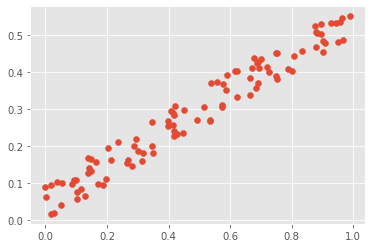

In [92]:
plt.scatter(x1,x2)

In [93]:
x3 = np.column_stack((np.ones(100), x1, x2))
results = sm.OLS(y, x3).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     16.13
Date:                Mon, 01 Aug 2022   Prob (F-statistic):           8.95e-07
Time:                        16:20:22   Log-Likelihood:                -144.37
No. Observations:                 100   AIC:                             294.7
Df Residuals:                      97   BIC:                             302.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2250      0.259      8.583      0.000       1.710       2.739
x1             2.4383      1.675      1.456      0.149      -0.886       5.763
x2            -0.8693      3.292     -0.264      0.792      -7.404       5.665
==============================================================================
Omnibus:                        0.285   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.867   Jarque-Bera (JB):                0.393
Skew:                           0.118   Prob(JB):                        0.822
Kurtosis:                       2.804   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
x1_new = np.append(x1, 0.1)
x2_new = np.append(x2, 0.8)
Z = np.append(y, 6)

Z.shape

(101,)

In [95]:
X = np.column_stack((np.ones(101), x1_new, x2_new))
results = sm.OLS(Z, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     18.11
Date:                Mon, 01 Aug 2022   Prob (F-statistic):           2.03e-07
Time:                        16:20:30   Log-Likelihood:                -146.74
No. Observations:                 101   AIC:                             299.5
Df Residuals:                      98   BIC:                             307.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9991      0.223      8.965      0.000       1.557       2.442
x1            -0.0749      0.736     -0.102      0.919      -1.535       1.385
x2             4.1206      1.382      2.982      0.004       1.378       6.863
==============================================================================
Omnibus:                        0.207   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.902   Jarque-Bera (JB):                0.370
Skew:                           0.075   Prob(JB):                        0.831
Kurtosis:                       2.744   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

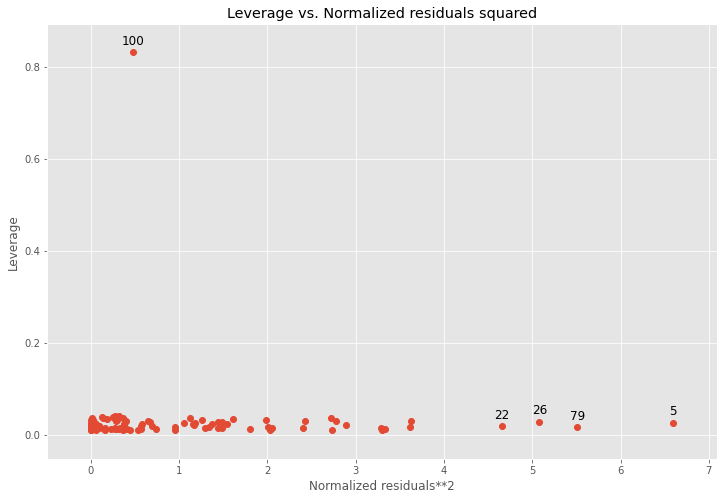

In [98]:
fig , ax = plt.subplots(figsize = (12,8))
fig = plot_leverage_resid2(results, ax = ax)